# LA County Health Disparities in Healthcare Accessibility

<i> Keven Michel </i>

<i> 10 February 2021 </i>

<b> Research Question </b> 

How does the number of health establishments and their quality of services offered affected by the median household income of the zip code they are located in LA County ?

<b> Data Sources </b>

Census Data: 

https://censusreporter.org/data/table/?table=B02001&geo_ids=05000US06037,860|05000US06037&primary_geo_id=05000US06037

Health Clinics in LA County:

https://egis-lacounty.hub.arcgis.com/datasets/health-clinics

Health Education and Counseling: 

https://egis-lacounty.hub.arcgis.com/datasets/health-education-and-counseling

Hospitals and Medical Centers: 

https://egis-lacounty.hub.arcgis.com/datasets/hospitals-and-medical-centers

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

## Health Education and Counseling 

##### Figure 1 

In [2]:
hec = gpd.read_file("datasets/HEC2.geojson")

In [3]:
fig = px.scatter_mapbox(hec,
                        lat='latitude',
                        lon='longitude',
                        mapbox_style="stamen-terrain",
                       color = "city")
fig.update_layout(mapbox_style="carto-darkmatter")
fig.show()

<b> Analysis on Figure 1 </b>

This map produces every location where health education and counseling services are provided in the LA County. This visualization allows us to better understand where most of these services are located and to provide greater insight on how close these services are to certain communities.  

##### Figure 2

In [4]:
hec_web_mercator = hec.to_crs(epsg = 3857)

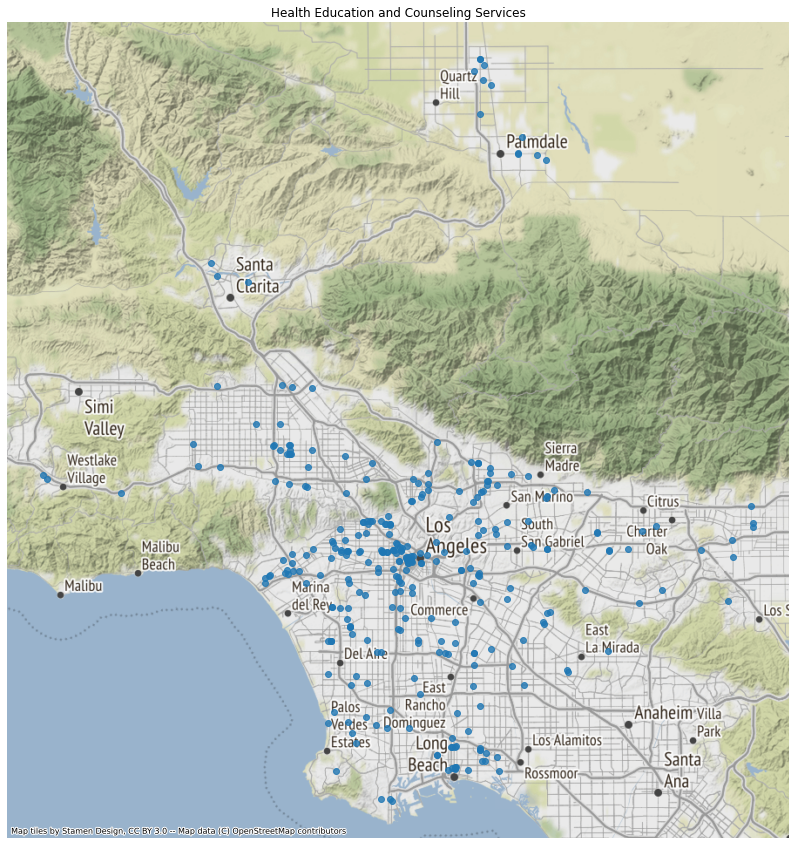

In [5]:
fig, ax = plt.subplots(figsize = (15,15))
hec_web_mercator.plot(ax = ax, alpha = 0.8)
ax.axis ("off")
ax.set_title("Health Education and Counseling Services")
ctx.add_basemap(ax)

<b> Analysis on Figure 2 </b>

This map provides a better visualization of the counties and cities that provide health education and counseling services. This map also gives us more detail on where there is more density of these services in particular locations. 

## Hospitals and Medical Centers in LA County

##### Figure 3 

In [5]:
hmc = gpd.read_file("datasets/HMC2.geojson")
hmc_web_mercator = hmc.to_crs(epsg = 3857)

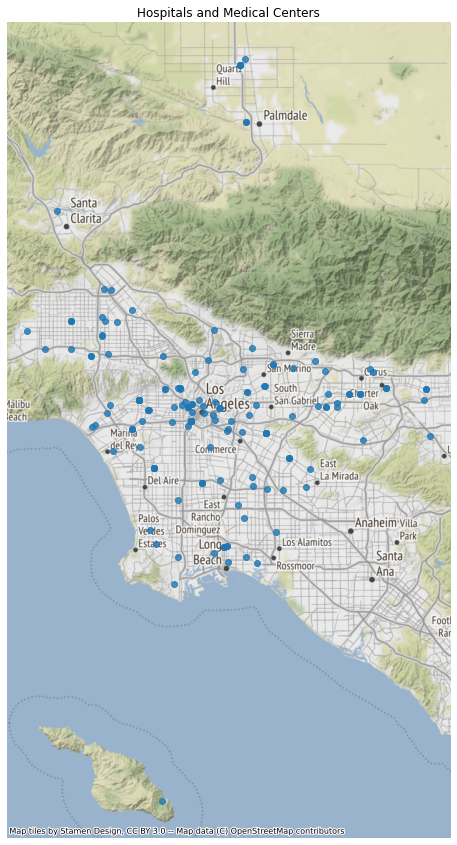

In [6]:
fig, ax = plt.subplots(figsize = (15,15))
hmc_web_mercator.plot(ax=ax, alpha = 0.8)

ax.axis("off")
ax.set_title("Hospitals and Medical Centers")
ctx.add_basemap(ax)

<b> Analysis on Figure 3 </b>

This map shows where the number of hospitals and medical centers are located. This map differs from the health clinics due to the type of services that are provided in different hospitals and medical centers. The importance of this map is to allow us to understand the proximity of these facilities to certain communities.

##### Figure 4

In [7]:
px.bar(hmc,
      x = "cat3",
      title = "Type of Hospital")

<b> Analysis on Figure 4 </b>

Figure 4 correlates to Figure 3 as it provides the type of services provided by certain hopsital and medical centers. This figure also correlates Figure 5 below.

##### Figure 5 

In [8]:
px.bar(hmc,
       x='city',
       y='zip',
       color='cat3' # this creates the "stack"
      )

<b> Analysis on Figure 5 </b>

The data provided allows us to see what type of services are given at hospitals and medical centers in the LA County. This is important to see how close a certain service is compared to other areas within the county. It also allows us to see where services are lacking for certain communities. For example, the number of rehabilitation centers in the county is very low and you can only find some in certain cities, as opposed of having more facilities in areas with higher need.

## Health Clinics in LA County

##### Figure 6

In [18]:
hcs = gpd.read_file("datasets/Health_Clinics.geojson")
hcs_web_mercator = hcs.to_crs(epsg = 3857)

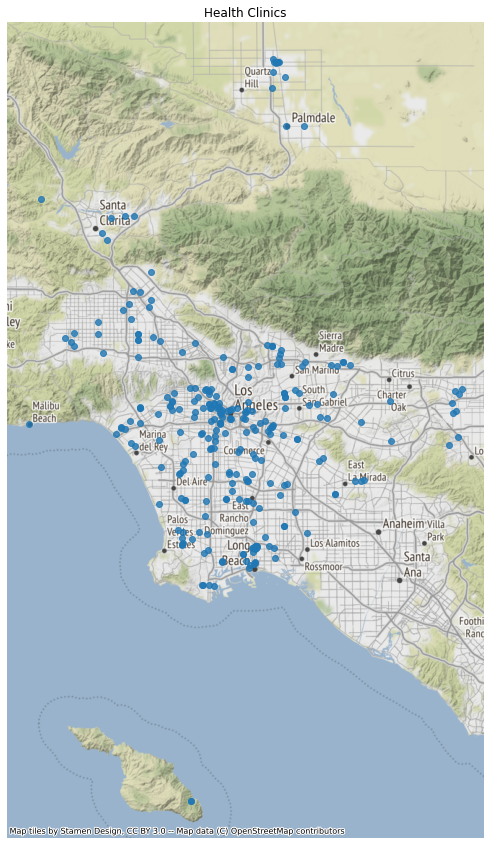

In [19]:
fig, ax = plt.subplots(figsize = (15,15))
hcs_web_mercator.plot(ax=ax, alpha = 0.8)

ax.axis("off")
ax.set_title("Health Clinics")
ctx.add_basemap(ax)

<b> Analysis on Figure 6 </b>

Similar to the maps on Health Ed. and Counseling, this map represents the number of available health clinics in the area. Our goal here is to gain new insights on the avaialable facilities in the LA county, compared to medical centers and counseling services. We also take this data and map into consideration with our datasets on race and income. 

##### Figure 7

In [20]:
from keplergl import KeplerGl

In [21]:
map = KeplerGl(height = 600, width = 600)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)

In [22]:
map.add_data(data = hcs, name = "Health Clinics")


<b> Analysis on Figure 7 </b> 

Similar to Figure 6, this map provides the same data but allows the users to interact with and get a closer look at certain points. 

## Census Data

In [25]:
census = gpd.read_file("datasets/zipcodes.geojson")

In [26]:
census = census.drop([0])

In [27]:
ctk = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry' ]

In [28]:
census = census[ctk]

In [29]:
census.columns = [ 
'geoid',
 'Zipcode',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [30]:
census["Percent Non Hispanic"] = census["Non Hispanic"]/census["Total"]*100
census['Percent Hispanic'] = census['Hispanic']/census['Total']*100

In [31]:
census['Percent Non Hispanic White'] = census['Non Hispanic White']/census['Total']*100
census['Percent Non Hispanic Black'] = census['Non Hispanic Black']/census['Total']*100
census['Percent Non Hispanic American Indian and Alaska Native'] = census['Non Hispanic American Indian and Alaska Native']/census['Total']*100
census['Percent Non Hispanic Asian'] = census['Non Hispanic Asian']/census['Total']*100
census['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = census['Non Hispanic Native Hawaiian and Other Pacific Islander']/census['Total']*100
census['Percent Non Hispanic Some other race'] = census['Non Hispanic Some other race']/census['Total']*100
census['Percent Non Hispanic Two or more races'] = census['Non Hispanic Two or more races']/census['Total']*100

##### Figure 8 

Text(0.5, 1.0, 'Percent Non Hispanic White')

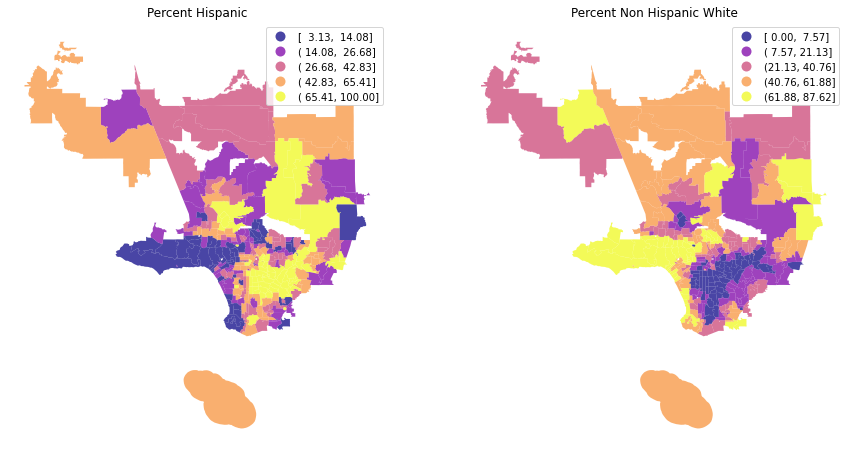

In [32]:
fig, axs = plt.subplots(1,2, figsize= (15,12))

ax1, ax2 = axs 

census.plot(column = "Percent Hispanic",
           cmap = "plasma",
           scheme = "quantiles",
           k = 5,
           edgecolor = "white",
           linewidth = 0,
           alpha = 0.75,
           ax = ax1,
           legend = True,
          )
ax1.axis("off")
ax1.set_title("Percent Hispanic")

census.plot(column = "Percent Non Hispanic White",
           cmap = "plasma",
           scheme = "quantiles",
           k=5,
           edgecolor = "white",
           linewidth = 0,
           alpha = 0.75,
           ax = ax2, 
           legend = True)
ax2.axis("off")
ax2.set_title("Percent Non Hispanic White")

<b> Analysis on Figure 8 </b>

These two maps represent the racial profiles of Hispanics and Non-Hispanic Whites. Using this, along with our data on income and maps with health clinics, gives us a better picture of "who" exactly is living in these communities and "what" services are being provided to them. 

## Conclusion and Midterm Observation

After analyzing all these visualizations using the data provided, we were able to identify that there does exist a correlation between a person income, race and their access to health care services. However, we also have data that shows us a rise in certain populations accessing more health care services after the Affordable Healthcare Act was signed by the Obama Administration in 2010. This midterm observation allows us to continue to find more insights on any health care disparities within the county of Los Angeles. 

## Authors and Roles

<b> Projected produced by Keven Michel and Frida Barragan </b>

This my notebook, I helped create these charts that focus on the locations of hospital, medical and health services available in LA County. My partner for this project focuses on the income levels, neighborhoods data and other data charts associated with our project. 

